In [2]:
import numpy as np, itertools
import tools21cm as t2c, numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from PIL import Image
from scipy import special
from tqdm import tqdm
from ipywidgets import interact

import astropy.units as u
import astropy.constants as cst
from astropy.cosmology import Planck18 as cosmo

## Fourier Transfor and the $uv$-coverage

Interferometric radio telescope observation is a technique used to enhance the resolution and sensitivity of observations. It involves combining signals from multiple separate telescopes or antenna elements and <i>"virtually simulate"</i> a telescope that can capture larger wavelength. 

This technique is based on the principle of interferometry, where the signals collected by separate telescopes are combined and analyzed to extract detailed information about astronomical objects.

<img src="images/hs-2010-13-g-small_web.jpg" alt="Drawing" style="width: 500px;"/>

In [3]:
img = Image.open('images/hs-2010-13-g-small_web.jpg')

# get only fist color channel
data = np.array(img)[...,0]

# calculate the 2D fourier transform
fft_data = np.fft.fft2(data)

# calculate fourier frequency and define a radial distance
freq_x = np.fft.fftfreq(data.shape[0], 1./data.shape[0])[...,None]
freq_y = np.fft.fftfreq(data.shape[1], 1./data.shape[1])[None, ...]

In [4]:
def plot_uvcut(cut, freq_x0, freq_y0):
    freq_r = np.sqrt((freq_x - freq_x0)**2 + (freq_y - freq_y0)**2)

    # define which spherical modes to remove
    mask = np.where(freq_r < cut, 1, 0)
    
    # remove fourier-modes
    mask_fft_data = fft_data * mask
    
    cut_img = np.fft.ifft2(mask_fft_data).real
    
    
    fig, axs = plt.subplots(figsize=(18,8), ncols=3, nrows=1, constrained_layout=True)
    axs[0].set_title('Residual image', size=18)
    im = axs[0].imshow(data-cut_img, cmap='bwr', vmin=-150, vmax=150)
    plt.colorbar(im, ax=axs[0], fraction=0.05)
    
    axs[1].set_title('Reconstructed image', size=18)
    im = axs[1].imshow(cut_img)
    
    axs[2].set_title('Fourier space', size=18)
    im = axs[2].imshow(np.fft.fftshift(np.abs(mask_fft_data)**2), norm=LogNorm())
    plt.colorbar(im, ax=axs[2], fraction=0.05)
    for ax in axs: ax.set_yticks([]), ax.set_xticks([])

interact(plot_uvcut, cut=(1e-3, 256), freq_x0=(-128, 128), freq_y0=(-128, 128))

interactive(children=(FloatSlider(value=128.0005, description='cut', max=256.0, min=0.001), IntSlider(value=0,…

<function __main__.plot_uvcut(cut, freq_x0, freq_y0)>

## Example incomplete uv-coverage
We will learn later that intereferometry 

In [5]:
#np.random.seed(2024)
size = 100
freq_x0 = np.random.uniform(-256, 256, size)
freq_y0 = np.random.uniform(-256, 256, size)

mask = np.zeros_like(data).astype(int)
cut = 5
for fx0, fy0 in zip(freq_x0, freq_y0):
    freq_r = np.sqrt((freq_x - fx0)**2 + (freq_y - fy0)**2)
    mask += np.where(freq_r < cut, 1, 0)

# remove fourier-modes
mask_fft_data = fft_data * mask

cut_img = np.fft.ifft2(mask_fft_data).real

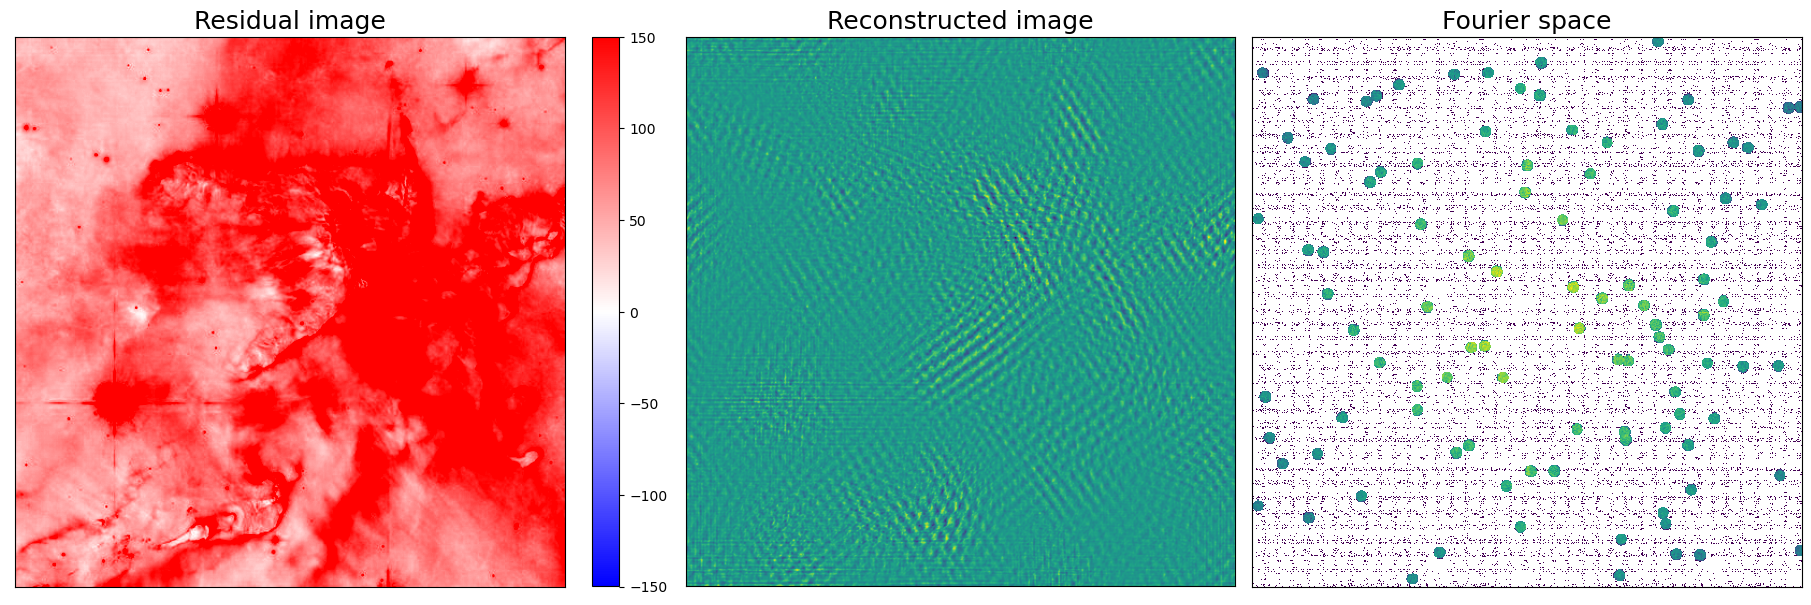

In [6]:
fig, axs = plt.subplots(figsize=(18,8), ncols=3, nrows=1, constrained_layout=True)
axs[0].set_title('Residual image', size=18)
im = axs[0].imshow(data-cut_img, cmap='bwr', vmin=-150, vmax=150)
plt.colorbar(im, ax=axs[0], fraction=0.05)

axs[1].set_title('Reconstructed image', size=18)
im = axs[1].imshow(cut_img)

axs[2].set_title('Fourier space', size=18)
im = axs[2].imshow(np.fft.fftshift(np.abs(mask_fft_data)**2), norm=LogNorm())
#plt.colorbar(im, ax=axs[2], fraction=0.05)
for ax in axs: ax.set_yticks([]), ax.set_xticks([])